# Scientific Programming: NumPy

In this lesson we'll review NumPy, a numerical package on Python which is going to be the main way we store and interact with data.

NumPy is built on top of C++ libraries. Normally Python as a computer language is very slow at things with loops and whenever possible you want to turn your data into a "vector" and operate on those vectors. The underlying C++ code (LAPACK) has very optimized routines for all the normal (and some abnormal) linear algebra routines one would do with normal matricies/vectors, such as transposition, diagionalization, dot product, etc.

Some other resources:

Absolute Beginners Guide [here](https://hackernoon.com/introduction-to-numpy-1-an-absolute-beginners-guide-to-machine-learning-and-data-science-5d87f13f0d51)

## Speed improvement in NumPy

In [1]:
# load numpy like this, which allows us to type np instead of numpy every time
import numpy as np


The basic object within NumPy is the array, which is essentially list with some fancy properties. More technically it is a class structure with methods associated with it, many of which call underlying C/C++ code to make operations more efficient.

In [11]:
n1 = np.array([3,4,5,4,4]) # initializing array
n2 = np.array([3,3,1,3,3]) # initializing array

n1 + n2

array([6, 7, 6, 7, 7])

In [12]:
#compare this to how native python lists work

a1 = [3,4,5,4,4]
a2 = [3,3,1,3,3]

a1 + a2

[3, 4, 5, 4, 4, 3, 3, 1, 3, 3]

In [16]:
def add_vec(a1,a2):
    x = [0,0,0,0,0]
    for i,j in enumerate(a1):
        x[i] = j + a2[i]
    return x

add_vec(a1,a2)

[6, 7, 6, 7, 7]

We can show how much more efficient NumPy is by using the "%timeit" magic command

In [14]:
%timeit add_vec(a1,a2)

937 ns ± 23.8 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [15]:
%timeit n1 + n2

528 ns ± 40.3 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


Note that we will often be dealing with even larger arrays where a naive python implementation would require nested loops! This means that this improvement of time will grow multiplicatively as we go to higher dimensions and larger arrays.

## Dealing with Arrays

So what other fun features to arrays have?! Note that, unlike python lists, all elements of a numpy array must be of the same type. Python will usually smartly convert everything to the same type if needed.

In [19]:
arr = np.array([1.2, 2, 3]) #one float, two ints

print(arr)

print(arr.dtype) #becomes all floats!

[1.2 2.  3. ]
float64


In [21]:
#We can also have higher dimensional arrays (in this case a matrix)
arr = np.array([ [1,2,3], [4,5,6], [7,8,9]])

print(arr) #which will display rather "prettily"

[[1 2 3]
 [4 5 6]
 [7 8 9]]


As we saw with ".dtype" arrays have various attributes and methods associated with them. This becomes useful when trying to "data-wrangle" and to get data in to the correct format for our anaylsis.

In [23]:
print(arr.ndim)

print(arr.shape)

2
(3, 3)


Like lists (and unlike strings) we can change elements of arrays, they are "mutable" in pythonic terms.

In [24]:
arr = np.array([1.2, 2, 3]) #one float, two ints

print(arr[0])

arr[0]=100

print(arr[0])

1.2
100.0


An N-dimensional array has N indices which are used to call certian elements or sets of elements.

In [26]:
#We can also have higher dimensional arrays (in this case a matrix)
arr = np.array([ [1,2,3], [4,5,6], [7,8,9]])

print(arr) #which will display rather "prettily"

print("This is the first element", arr[0,0])

print("This is the first columnm", arr[:,0])

print("This is the first row", arr[0,:])

[[1 2 3]
 [4 5 6]
 [7 8 9]]
This is the first element 1
This is the first columnm [1 4 7]
This is the first row [1 2 3]


In [129]:
# we can also use negative indexing...
arr = np.array([1.2, 2, 3,5,10])

print(arr[-1]) 


10.0


In [130]:
# we can also call specific indexes in the form of a list

print(arr[[3,1,0]])


[5.  2.  1.2]


In [132]:
arr[1:4] # slicing an array

array([2., 3., 5.])

In [84]:
# we can also call every other (or every nth) element of an array
arr = np.array([1, 2, 3,4,5,6,7,8])

print(arr[1::2]) # note the two : signs
print(arr[::3]) # note the two : signs

[2 4 6 8]
[1 4 7]


## (Common) methods associated with arrays

Some common array "gymnastics" that often come up...

In [41]:
arr = np.array([1, 2, 3,4,5,6,7,8])

print("original array", arr)

new_arr = arr.reshape(2,4)
print(new_arr)

print("back to original", new_arr.flatten())


original array [1 2 3 4 5 6 7 8]
[[1 2 3 4]
 [5 6 7 8]]
back to original [1 2 3 4 5 6 7 8]


When reshaping (as well as other select times) we can use negative indexing to have numpy be "smart" in selecting the proper number... i.e.

In [44]:
print(arr)
new_arr = arr.reshape(4,-1)
print(new_arr)

[1 2 3 4 5 6 7 8]
[[1 2]
 [3 4]
 [5 6]
 [7 8]]


In [47]:
#transpose
print(new_arr)

print(new_arr.transpose())

[[1 2]
 [3 4]
 [5 6]
 [7 8]]
[[1 3 5 7]
 [2 4 6 8]]


In [117]:
new_arr.transpose() #returns a new array which is the transpose of the original

array([[1, 3, 5, 7],
       [2, 4, 6, 8]])

In [118]:
arr = np.array([3,5,10,11,2,3,9,100,2])
arr.sort() #note this mutes the original array! It doesn't return a new array... 
#This is likely done for memory reasons when dealing with large arrays...

print(arr)

[  2   2   3   3   5   9  10  11 100]


In [127]:
arr.sum() #sum of all elements

145

## Adding Arrays together

Often times it is nessisary to add together different arrays to make a larger arrays. While numpy can be smart in doing this, the cardinal rule is that the commands are set up to avoid any ambigiouty in how we are adding the arrays. All arrays must be rectangular in the end!

In [50]:
# vertically stacking

np.vstack([new_arr,new_arr])

array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8],
       [1, 2],
       [3, 4],
       [5, 6],
       [7, 8]])

In [51]:
# horizontally stacking

np.hstack([new_arr,new_arr])

array([[1, 2, 1, 2],
       [3, 4, 3, 4],
       [5, 6, 5, 6],
       [7, 8, 7, 8]])

In [53]:
# element-wise adding...

new_arr + new_arr

array([[ 2,  4],
       [ 6,  8],
       [10, 12],
       [14, 16]])

In [63]:
# addin elements of different sizes?

toadd = np.array([10,10])

print(new_arr + toadd)

toadd = np.array([10,20])

print(new_arr + toadd)


toadd = np.array([10,20,30,40]).reshape(4,-1) #making the dimensions line up correctly!

print(new_arr + toadd)

[[11 12]
 [13 14]
 [15 16]
 [17 18]]
[[11 22]
 [13 24]
 [15 26]
 [17 28]]
[[11 12]
 [23 24]
 [35 36]
 [47 48]]


In [68]:
#adding subsets of arrays

arr1 = np.array([ [1,2,3], [4,5,6], [7,8,9]])

arr2 = np.array([[10,10],[10,10]])

arr1 + arr2 #ERROR! OH NO!

ValueError: operands could not be broadcast together with shapes (3,3) (2,2) 

In [69]:
print(arr1)

arr1[0:2,0:2] += arr2 # smart indexing and using the built in += python feature!

print(arr1)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[11 12  3]
 [14 15  6]
 [ 7  8  9]]


## Booleans and Masking

Often times we want to "mask" data or otherwise filter in order to only use a subset. Maybe we have information about all students but only want to analyze students who are seniors for example. Here we can use boolean numpy arrays to do a lot of the work!

In [77]:
data = np.array([[9,3.0],[9,2.0],[10,3.],[10,1.],[9,4],[11,3.],[12,8.],[11,3],[12,7],[9,8]])
print(data)

[[ 9.  3.]
 [ 9.  2.]
 [10.  3.]
 [10.  1.]
 [ 9.  4.]
 [11.  3.]
 [12.  8.]
 [11.  3.]
 [12.  7.]
 [ 9.  8.]]


In [76]:
print(data[:,0] == 12.)
filt = data[:,0] == 12.

data[filt] #selecting only seniors

[False False False False False False  True False  True]


array([[12.,  8.],
       [12.,  7.]])

In [81]:
# can also use np.where to make more complex masks
filt = np.where( (data[:,0] > 9) & (data[:,0] < 12) )
print(filt) #returns the indexes where the condition is true, rather than a boolean array

data[filt]

(array([2, 3, 5, 7]),)


array([[10.,  3.],
       [10.,  1.],
       [11.,  3.],
       [11.,  3.]])

We can also use the where statement in a more "fancy" way

np.where(condition, value if True, value if False)


In [88]:
np.where(data[:,0] > 10, data[:,0], -1)


array([-1., -1., -1., -1., -1., 11., 12., 11., 12., -1.])

## Initalizing Arrays

Often times we will want to initialize large arrays with certain properties. Here are some very common ones (I use them almost daily!)

In [95]:
np.zeros([3,3])

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [96]:
np.ones([3,3])

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [100]:
np.random.random([3,3])  #random between [0,1], we will talk about other distributions later this class!

array([[0.6581679 , 0.03588234, 0.83558891],
       [0.62997763, 0.32170812, 0.82635748],
       [0.12067306, 0.05521552, 0.67450398]])

In [121]:
np.linspace(0, 10, 10) #linear spaced between 0 and 10

array([ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
        5.55555556,  6.66666667,  7.77777778,  8.88888889, 10.        ])

In [124]:
np.logspace(0, 1, 10) #logspaced between 10**0 and 10**1, useful for log-plots

array([ 1.        ,  1.29154967,  1.66810054,  2.15443469,  2.7825594 ,
        3.59381366,  4.64158883,  5.9948425 ,  7.74263683, 10.        ])

# Saving/Loading Arrays

NumPy makes loading and saving arrays easy! :D We can do this either in NumPy's special binary format or in a normal text format. NumPy's special format is often nice when dealing with large arrays as it deals consistently with the dimensionality of the array, but it isn't "human readable" like a text file is...

In [101]:
test = np.random.random([3,3])

np.save("test",test)

In [106]:
%%bash

more -f test.npy

�NUMPY v {'descr': '<f8', 'fortran_order': False, 'shape': (3, 3), }                                                          
�H�R���? ��Z��?�3}	9�?�m[(q��?<��,�k�?\Ѧ�<�? �_4J}�?��q�L�?���z~��?

In [102]:
np.load("./test.npy")

array([[0.74583355, 0.05208857, 0.88196253],
       [0.43117932, 0.2454808 , 0.91369535],
       [0.01805607, 0.45780955, 0.86199879]])

vs. a text file!

In [107]:
np.savetxt("test.txt",test)

In [108]:
%%bash

more -f test.txt

7.458335506837781015e-01 5.208857463128602205e-02 8.819625325490942913e-01
4.311793226349598385e-01 2.454807967860349605e-01 9.136953496404589536e-01
1.805606789273284107e-02 4.578095541727977835e-01 8.619987867191917230e-01


In [109]:
np.loadtxt("test.txt")

array([[0.74583355, 0.05208857, 0.88196253],
       [0.43117932, 0.2454808 , 0.91369535],
       [0.01805607, 0.45780955, 0.86199879]])

In [110]:
%%bash

ls -lh ./

total 64
-rw-r--r--  1 benjaminhorowitz  staff    23K Jul 11 21:30 NumPy (Lesson 2).ipynb
-rw-r--r--  1 benjaminhorowitz  staff   200B Jul 11 21:27 test.npy
-rw-r--r--  1 benjaminhorowitz  staff   225B Jul 11 21:30 test.txt


Note that the numpy binary format is slightly smaller as well? The difference is minimal though...

In [152]:
np.savetxt("./data/dist.txt",np.random.gamma(10,size=[1000]))

## Numpy Functions

In addition to built in methods, there are a large number of functions which one can use to operate on arrays/sets of arrays. Again these are designed to optimize for speed over just looping over the arrays.

In [156]:
arr = np.random.rand(10)

print(arr)

[0.44981718 0.39450161 0.44148039 0.28012172 0.18049439 0.94577068
 0.41774047 0.63513442 0.69040093 0.55161995]


In [159]:
print(arr**2)
print(arr+1)

[0.20233549 0.15563152 0.19490493 0.07846818 0.03257823 0.89448218
 0.1745071  0.40339573 0.47665344 0.30428456]
[1.44981718 1.39450161 1.44148039 1.28012172 1.18049439 1.94577068
 1.41774047 1.63513442 1.69040093 1.55161995]


In [169]:
#pretty much all "math" commands have a numpy version
print(np.exp(arr+3))
print(np.arctan(arr+30))
#etc.

[31.49463382 29.79979774 31.23316121 26.57900768 24.05864504 51.71617943
 30.50042051 37.90694803 40.06090538 34.86975888]
[1.53796721 1.5379075  1.53795822 1.53778336 1.53767446 1.53849297
 1.53793261 1.53816565 1.53822437 1.53807652]


# Basic Statistics/Probability

Some basic statistics which we will use in this course...

Chapter 3 of this is a good starting point: [here](https://www.stat.auckland.ac.nz/~brewer/stats331.pdf)

Basic concepts:

1) Probability Density Function (PDF)

2) Prior Distribution

3) Posterior Distribution

4) Likelihood

## Bayesian Example in Python...

I'm making Guacamole for a large party at the last minute and I need 100 avocados. When I go to the food store, I don't have time to check to see if all avocados are ripe, but I quickly feel 5 avocados and note that only four of them are currently ripe. How many avocados do I need to buy in order to know with 80% confidence I will have 100 ripe avocados?

### Solution

We are trying to estimate the parameter of "fraction of avocados that are ripe." This parameter could vary from zero (none are ripe) to 1 (all are ripe). 

For a prior, we really have no idea about how likely the supermarket is to have ripe avocados. In cases like this it is often useful to assume a "flat" prior. (If we were feeling smarter we could maybe think people before us preferentially pick up ripe avocados, making the fraction ripe more likey to be lower than higher, but less ignore such subtities for now)

For our likelihood, we heed to calculate the probability of a certain parameter given the data we have (that 4 of 5 are ripe). This likihood can be given by a binomial distribution (similar to flipping a coin).

$$p(x|\theta) = {N\choose x} \theta^{x}(1-\theta)^{N-x}$$

In [212]:
import math

def binom(x,N,Theta):
    return math.factorial(N)/(math.factorial(x)*math.factorial(N-x))*np.power(Theta,x)*np.power(1-Theta,N-x)

In [213]:


theta = np.linspace(0, 1, 110)

print(theta)

[0.         0.00917431 0.01834862 0.02752294 0.03669725 0.04587156
 0.05504587 0.06422018 0.0733945  0.08256881 0.09174312 0.10091743
 0.11009174 0.11926606 0.12844037 0.13761468 0.14678899 0.1559633
 0.16513761 0.17431193 0.18348624 0.19266055 0.20183486 0.21100917
 0.22018349 0.2293578  0.23853211 0.24770642 0.25688073 0.26605505
 0.27522936 0.28440367 0.29357798 0.30275229 0.31192661 0.32110092
 0.33027523 0.33944954 0.34862385 0.35779817 0.36697248 0.37614679
 0.3853211  0.39449541 0.40366972 0.41284404 0.42201835 0.43119266
 0.44036697 0.44954128 0.4587156  0.46788991 0.47706422 0.48623853
 0.49541284 0.50458716 0.51376147 0.52293578 0.53211009 0.5412844
 0.55045872 0.55963303 0.56880734 0.57798165 0.58715596 0.59633028
 0.60550459 0.6146789  0.62385321 0.63302752 0.64220183 0.65137615
 0.66055046 0.66972477 0.67889908 0.68807339 0.69724771 0.70642202
 0.71559633 0.72477064 0.73394495 0.74311927 0.75229358 0.76146789
 0.7706422  0.77981651 0.78899083 0.79816514 0.80733945 0.816513

In [214]:
prior = np.ones(len(theta))/len(theta)

print(prior)

[0.00909091 0.00909091 0.00909091 0.00909091 0.00909091 0.00909091
 0.00909091 0.00909091 0.00909091 0.00909091 0.00909091 0.00909091
 0.00909091 0.00909091 0.00909091 0.00909091 0.00909091 0.00909091
 0.00909091 0.00909091 0.00909091 0.00909091 0.00909091 0.00909091
 0.00909091 0.00909091 0.00909091 0.00909091 0.00909091 0.00909091
 0.00909091 0.00909091 0.00909091 0.00909091 0.00909091 0.00909091
 0.00909091 0.00909091 0.00909091 0.00909091 0.00909091 0.00909091
 0.00909091 0.00909091 0.00909091 0.00909091 0.00909091 0.00909091
 0.00909091 0.00909091 0.00909091 0.00909091 0.00909091 0.00909091
 0.00909091 0.00909091 0.00909091 0.00909091 0.00909091 0.00909091
 0.00909091 0.00909091 0.00909091 0.00909091 0.00909091 0.00909091
 0.00909091 0.00909091 0.00909091 0.00909091 0.00909091 0.00909091
 0.00909091 0.00909091 0.00909091 0.00909091 0.00909091 0.00909091
 0.00909091 0.00909091 0.00909091 0.00909091 0.00909091 0.00909091
 0.00909091 0.00909091 0.00909091 0.00909091 0.00909091 0.0090

In [218]:
lik = binom(4,5,theta) # Binomail Distribution

print(lik)


[0.00000000e+00 3.50962949e-08 5.56341267e-07 2.79015544e-06
 8.73507783e-06 2.11227701e-05 4.33790204e-05 7.95847482e-05
 1.34437007e-04 2.13209991e-04 3.21716036e-04 4.66266626e-04
 6.53633395e-04 8.91009136e-04 1.18596880e-03 1.54643049e-03
 1.98061650e-03 2.49701429e-03 3.10433747e-03 3.81148687e-03
 4.62751147e-03 5.56156946e-03 6.62288922e-03 7.82073031e-03
 9.16434451e-03 1.06629368e-02 1.23256264e-02 1.41614076e-02
 1.61791112e-02 1.83873648e-02 2.07945547e-02 2.34087861e-02
 2.62378445e-02 2.92891566e-02 3.25697516e-02 3.60862216e-02
 3.98446832e-02 4.38507380e-02 4.81094343e-02 5.26252271e-02
 5.74019400e-02 6.24427260e-02 6.77500280e-02 7.33255404e-02
 7.91701700e-02 8.52839965e-02 9.16662343e-02 9.83151929e-02
 1.05228238e-01 1.12401753e-01 1.19831099e-01 1.27510577e-01
 1.35433389e-01 1.43591595e-01 1.51976082e-01 1.60576517e-01
 1.69381312e-01 1.78377585e-01 1.87551121e-01 1.96886331e-01
 2.06366214e-01 2.15972319e-01 2.25684707e-01 2.35481907e-01
 2.45340883e-01 2.552369

Populating the interactive namespace from numpy and matplotlib


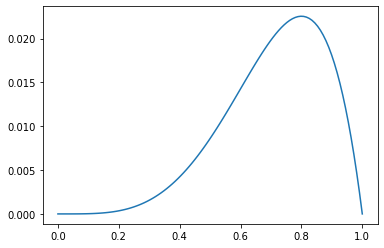

In [219]:
# to get the posterior we multiply by the prior and then normalize

h = prior*lik
post = h/np.sum(h)
%pylab inline
plt.plot(theta,post)

In [220]:
for i,j in enumerate(post):
    if np.sum(post[:i])>0.20:
        print(theta[i],np.sum(post[:i]))
        break #exit the loop

0.5871559633027523 0.20717563539055767


So we would need 100/0.58 or 173 avocados to be 80% certain we have enough!